In [1]:
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
import pandas as pd
import numpy as np
from itertools import cycle, islice
import matplotlib.pyplot as plt
from pandas.plotting import parallel_coordinates
%matplotlib inline

In [3]:
data = pd.read_csv('F:\wtr data\minute_weather.csv')

In [4]:
data.shape

(1587257, 13)

In [5]:
data.head()

,rowID,hpwren_timestamp,air_pressure,air_temp,avg_wind_direction,avg_wind_speed,max_wind_direction,max_wind_speed,min_wind_direction,min_wind_speed,rain_accumulation,rain_duration,relative_humidity
0,0,2011-09-10 00:00:49,912.3,64.76,97.0,1.2,106.0,1.6,85.0,1.0,NaN,NaN,60.5
1,1,2011-09-10 00:01:49,912.3,63.86,161.0,0.8,215.0,1.5,43.0,0.2,0.0,0.0,39.9
2,2,2011-09-10 00:02:49,912.3,64.22,77.0,0.7,143.0,1.2,324.0,0.3,0.0,0.0,43.0
3,3,2011-09-10 00:03:49,912.3,64.40,89.0,1.2,112.0,1.6,12.0,0.7,0.0,0.0,49.5
4,4,2011-09-10 00:04:49,912.3,64.40,185.0,0.4,260.0,1.0,100.0,0.1,0.0,0.0,58.8


In [6]:
sampled_df = data[(data['rowID']%10) == 0]
sampled_df.shape

(158726, 13)

In [8]:
sampled_df.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
rowID,158726.0,793625.000000,458203.937509,0.00,396812.5,793625.00,1190437.50,1587250.00
air_pressure,158726.0,916.830161,3.051717,905.00,914.8,916.70,918.70,929.50
air_temp,158726.0,61.851589,11.833569,31.64,52.7,62.24,70.88,99.50
avg_wind_direction,158680.0,162.156100,95.278201,0.00,62.0,182.00,217.00,359.00
avg_wind_speed,158680.0,2.775215,2.057624,0.00,1.3,2.20,3.80,31.90
max_wind_direction,158680.0,163.462144,92.452139,0.00,68.0,187.00,223.00,359.00
max_wind_speed,158680.0,3.400558,2.418802,0.10,1.6,2.70,4.60,36.00
min_wind_direction,158680.0,166.774017,97.441109,0.00,76.0,180.00,212.00,359.00
min_wind_speed,158680.0,2.134664,1.742113,0.00,0.8,1.60,3.00,31.60
rain_accumulation,158725.0,0.000318,0.011236,0.00,0.0,0.00,0.00,3.12


In [9]:
sampled_df[sampled_df['rain_accumulation'] == 0].shape

(157812, 13)

In [10]:
sampled_df[sampled_df['rain_duration'] == 0].shape

(157237, 13)

In [11]:
del sampled_df['rain_accumulation']
del sampled_df['rain_duration']

In [12]:
rows_before = sampled_df.shape[0]
sampled_df = sampled_df.dropna()
rows_after = sampled_df.shape[0]

In [13]:
rows_before - rows_after

46

In [14]:
sampled_df.columns

Index(['rowID', 'hpwren_timestamp', 'air_pressure', 'air_temp',
       'avg_wind_direction', 'avg_wind_speed', 'max_wind_direction',
       'max_wind_speed', 'min_wind_direction', 'min_wind_speed',
       'relative_humidity'],
      dtype='object')

In [15]:
features = ['air_pressure','air_temp','avg_wind_direction','avg_wind_speed',
            'max_wind_direction','max_wind_speed','relative_humidity']

In [16]:
select_df = sampled_df[features]

In [17]:
select_df.columns

Index(['air_pressure', 'air_temp', 'avg_wind_direction', 'avg_wind_speed',
       'max_wind_direction', 'max_wind_speed', 'relative_humidity'],
      dtype='object')

In [18]:
select_df

,air_pressure,air_temp,avg_wind_direction,avg_wind_speed,max_wind_direction,max_wind_speed,relative_humidity
0,912.3,64.76,97.0,1.2,106.0,1.6,60.5
10,912.3,62.24,144.0,1.2,167.0,1.8,38.5
20,912.2,63.32,100.0,2.0,122.0,2.5,58.3
30,912.2,62.60,91.0,2.0,103.0,2.4,57.9
40,912.2,64.04,81.0,2.6,88.0,2.9,57.4
...,...,...,...,...,...,...,...
1587210,915.9,75.56,330.0,1.0,341.0,1.3,47.8
1587220,915.9,75.56,330.0,1.1,341.0,1.4,48.0
1587230,915.9,75.56,344.0,1.4,352.0,1.7,48.0
1587240,915.9,75.20,359.0,1.3,9.0,1.6,46.3


In [19]:
x = StandardScaler().fit_transform(select_df)

In [20]:
x

array([[-1.48456281,  0.24544455, -0.68385323, ..., -0.62153592,
        -0.74440309,  0.49233835],
       [-1.48456281,  0.03247142, -0.19055941, ...,  0.03826701,
        -0.66171726, -0.34710804],
       [-1.51733167,  0.12374562, -0.65236639, ..., -0.44847286,
        -0.37231683,  0.40839371],
       ...,
       [-0.30488381,  1.15818654,  1.90856325, ...,  2.0393087 ,
        -0.70306017,  0.01538018],
       [-0.30488381,  1.12776181,  2.06599745, ..., -1.67073075,
        -0.74440309, -0.04948614],
       [-0.30488381,  1.09733708, -1.63895404, ..., -1.55174989,
        -0.62037434, -0.05711747]])

In [21]:
Kmeans = KMeans(n_clusters = 12)
model = Kmeans.fit(x)
print("model \n",model)

model 
 KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
       n_clusters=12, n_init=10, n_jobs=None, precompute_distances='auto',
       random_state=None, tol=0.0001, verbose=0)


In [22]:
centers = model.cluster_centers_
centers

array([[ 0.76225095,  0.39738518,  0.29265702, -0.52641506,  0.48005852,
        -0.53235227, -0.77181554],
       [ 0.05869595, -0.78523877, -1.1956501 , -0.57081751, -1.04162756,
        -0.58528684,  0.87603389],
       [ 0.127475  ,  0.85013445,  1.41081348, -0.63820044,  1.67488648,
        -0.58897428, -0.71490198],
       [-0.84396124, -1.19556854,  0.3737301 ,  0.34474785,  0.4723422 ,
         0.33266447,  1.36109807],
       [ 1.18973751, -0.25509558, -1.1550736 ,  2.12733246, -1.05345144,
         2.24473808, -1.13439117],
       [-0.15969993,  0.86202993, -1.30996926, -0.59028056, -1.16549771,
        -0.60559079, -0.64345732],
       [-1.17652119, -0.87820003,  0.44639992,  1.97289275,  0.53835343,
         1.93401358,  0.91658515],
       [-0.67410583,  0.56712098,  0.18031615, -0.58898153,  0.35063066,
        -0.60227265, -0.13385046],
       [ 1.36983923, -0.08333106, -1.20745762, -0.04369573, -1.07651463,
        -0.02312516, -0.97804362],
       [ 0.25173309, -0.9935

In [23]:
#function that creates a Data frame with a column for cluster number

def pd_centers(featuresUsed, centers):
    colNames = list(featuresUsed)
    colNames.append('prediction')
    #zip with a column cld prdctn index
    Z = [np.append(A,index) for index, A in enumerate(centers)]
    
    #convert to pandas data frame for plotting
    
    P = pd.DataFrame(Z,columns=colNames)
    P['prediction'] = P['prediction'].astype(int)
    return P

In [24]:
#function creates parallel plots

def parallel_plot(data):
    my_colors = list(islice(cycle(['b' , 'r' , 'g' , 'y' , 'k']),None , len(data)))
    plt.figure(figsize = (15,8)).gca().axes.set_ylim([-3,+3])
    parallel_coordinates(data, 'prediction',color = my_colors,marker = 'o')

In [25]:
P = pd_centers(features,centers)
P

,air_pressure,air_temp,avg_wind_direction,avg_wind_speed,max_wind_direction,max_wind_speed,relative_humidity,prediction
0,0.762251,0.397385,0.292657,-0.526415,0.480059,-0.532352,-0.771816,0
1,0.058696,-0.785239,-1.195650,-0.570818,-1.041628,-0.585287,0.876034,1
2,0.127475,0.850134,1.410813,-0.638200,1.674886,-0.588974,-0.714902,2
3,-0.843961,-1.195569,0.373730,0.344748,0.472342,0.332664,1.361098,3
4,1.189738,-0.255096,-1.155074,2.127332,-1.053451,2.244738,-1.134391,4
5,-0.159700,0.862030,-1.309969,-0.590281,-1.165498,-0.605591,-0.643457,5
6,-1.176521,-0.878200,0.446400,1.972893,0.538353,1.934014,0.916585,6
7,-0.674106,0.567121,0.180316,-0.588982,0.350631,-0.602273,-0.133850,7
8,1.369839,-0.083331,-1.207458,-0.043696,-1.076515,-0.023125,-0.978044,8
9,0.251733,-0.993575,0.662754,-0.547575,0.854455,-0.529934,1.160400,9


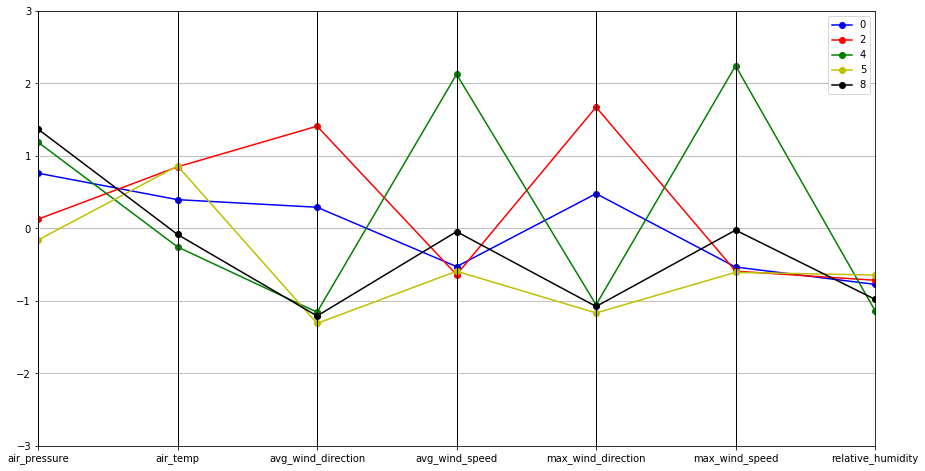

In [26]:
parallel_plot(P[P['relative_humidity'] < -0.5])

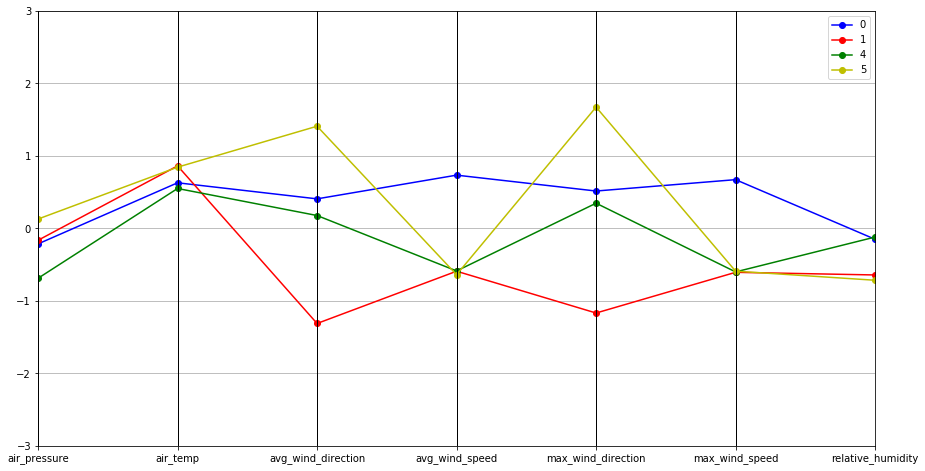

In [35]:
parallel_plot(P[P['air_temp'] > 0.5])

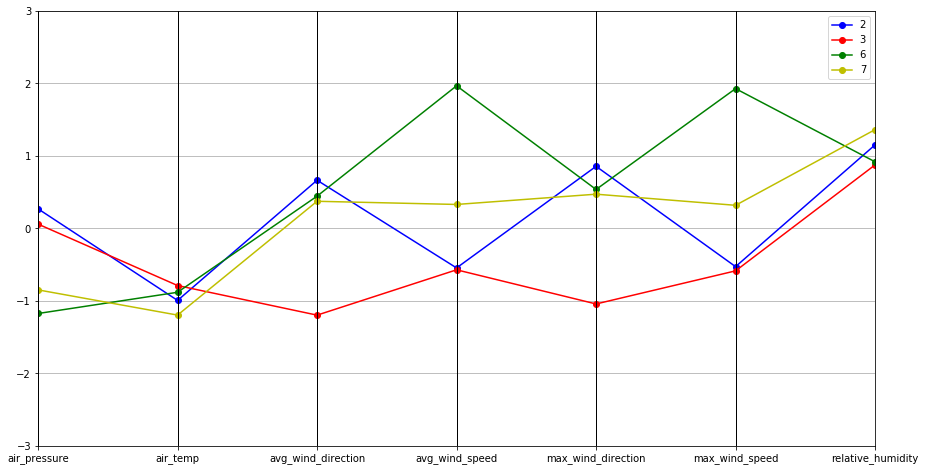

In [36]:
parallel_plot(P[(P['relative_humidity'] > 0.5) & (P['air_temp'] < 0.5)])